In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
#from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.applications.inception_v3 import InceptionV3
#from keras.preprocessing import image
#from keras.models import Model
#from keras.layers import Dense, GlobalAveragePooling2D
#from keras import backend as K

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [2]:
!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7012 sha256=74c822c814c466a6ff409c92c3401ae2aa4679dbc30e0fb4b8d2fcd43b25ad3a
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [3]:
IMAGE_SIZE = (224, 224)
classifier_url ="https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4" 
classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])
test_image = get_file('img.jpg','https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image = np.array(test_image)/255.0
test_image.shape
result = classifier.predict(test_image[np.newaxis, ...])
#aumentar el vector en 1
result.shape
predicted_class = np.argmax(result[0], axis=-1)
predicted_class
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [0]:
class_names = ['bugs bunny','Daffy duck']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'bugs bunny')  
train_im_dir = os.path.join(train_dir, 'Daffy duck')  
validation_ca_dir = os.path.join(validation_dir, 'bugs bunny') 
validation_im_dir = os.path.join(validation_dir, 'Daffy duck')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      img = Image.open(os.path.join(src,file_name))
      img = img.resize(image_resize, Image.ANTIALIAS)
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return

In [9]:
queries = ['bugs bunny','Daffy duck']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='bugs bunny'+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=bugs bunnybugs bunny&source=lnms&tbm=isch
Total Time : 0:00:00.000386
Invalid image:  3.jpg cannot write mode RGBA as JPEG
Invalid image:  88.jpg cannot write mode RGBA as JPEG
Invalid image:  80.jpg cannot write mode RGBA as JPEG
Invalid image:  23.jpg cannot write mode RGBA as JPEG
Invalid image:  84.jpg cannot write mode P as JPEG
Invalid image:  7.jpg cannot write mode P as JPEG
Invalid image:  21.jpg cannot write mode P as JPEG
Invalid image:  82.jpg cannot write mode RGBA as JPEG
Invalid image:  71.jpg cannot write mode RGBA as JPEG
Invalid image:  87.jpg cannot write mode RGBA as JPEG
Invalid image:  29.jpg cannot write mode RGBA as JPEG
Invalid image:  76.jpg cannot write mode RGBA as JPEG
Invalid image:  32.jpg cannot write mode RGBA as JPEG
Invalid image:  59.jpg cannot write mode RGBA as JPEG
Invalid image:  5.jpg cannot write mode RGBA as JPEG
Invalid image:  0.jpg cannot write mode RGBA as JPEG
Invalid image:  4.jpg cannot write mode RGBA 

In [10]:
queries = ['bugs bunny','Daffy duck']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='Daffy duck'+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=Daffy duckbugs bunny&source=lnms&tbm=isch
Total Time : 0:00:02.852316
Invalid image:  42.jpg cannot write mode RGBA as JPEG
Invalid image:  52.jpg cannot write mode RGBA as JPEG
Invalid image:  49.jpg cannot write mode P as JPEG
Invalid image:  92.jpg cannot write mode P as JPEG
Invalid image:  17.jpg cannot write mode RGBA as JPEG
Invalid image:  56.jpg cannot write mode P as JPEG
Invalid image:  68.jpg cannot write mode P as JPEG
Invalid image:  55.jpg cannot write mode P as JPEG
Invalid image:  24.jpg cannot write mode P as JPEG
Invalid image:  18.jpg cannot write mode RGBA as JPEG
Invalid image:  71.jpg cannot write mode P as JPEG
Invalid image:  63.jpg cannot write mode RGBA as JPEG
Invalid image:  0.jpg cannot write mode RGBA as JPEG
Invalid image:  39.jpg cannot write mode RGBA as JPEG
Invalid image:  35.jpg cannot write mode P as JPEG
https://www.google.co.in/search?q=Daffy duckDaffy duck&source=lnms&tbm=isch
Total Time : 0:00:02.486313
Invalid

In [11]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training bugs bunny images:', len(os.listdir(train_ca_dir)))
print('total training Daffy duck images:', len(os.listdir(train_im_dir)))

print('total validation bugs bunny images:', len(os.listdir(validation_ca_dir)))
print('total validation Daffy duck images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training bugs bunny images: 0
total training Daffy duck images: 148
total validation bugs bunny images: 0
total validation Daffy duck images: 22
--
Total training images: 148
Total validation images: 22


In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')


Found 148 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


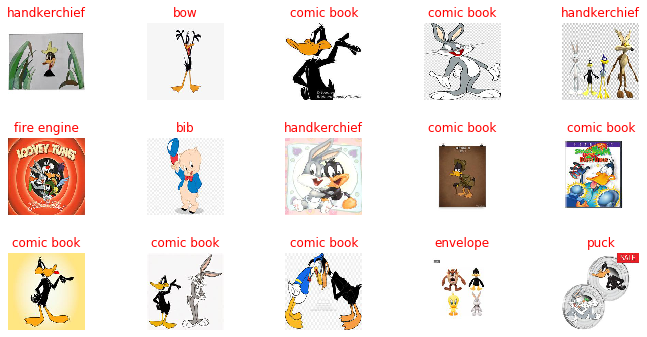

In [13]:
image_batch, labels_batch = next(train_data_gen)
result_batch = classifier.predict(image_batch)
result_batch.shape
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')
plot_images(image_batch, labels_batch, predicted_class_names)

(32, 1001)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              55875273  
_________________________________________________________________
dense (Dense)                (None, 1024)              1026048   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 56,902,346
Trainable params: 1,027,073
Non-trainable params: 55,875,273
_________________________________________________________________


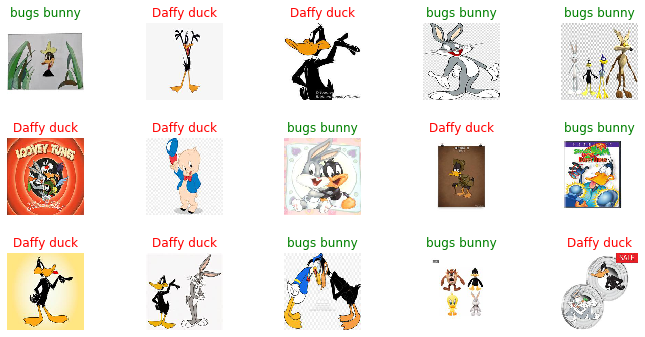

In [14]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)
feature_extractor_layer.trainable = False
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 1 steps
Epoch 1/5
5/5 [==============================] - 55s 11s/step - loss: 0.1562 - accuracy: 0.8919 - val_loss: 1.7825e-05 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 40s 8s/step - loss: 6.6638e-06 - accuracy: 1.0000 - val_loss: 2.7589e-07 - val_accuracy: 1.0000
Epoch 3/5
5/5 [==============================] - 40s 8s/step - loss: 1.9889e-06 - accuracy: 1.0000 - val_loss: 2.5276e-08 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 40s 8s/step - loss: 8.9108e-07 - accuracy: 1.0000 - val_loss: 5.8449e-09 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 40s 8s/step - loss: 5.1637e-07 - accuracy: 1.0000 - val_loss: 2.3408e-09 - val_accuracy: 1.0000


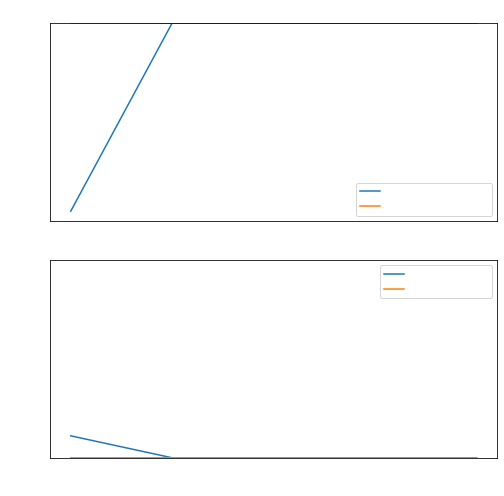

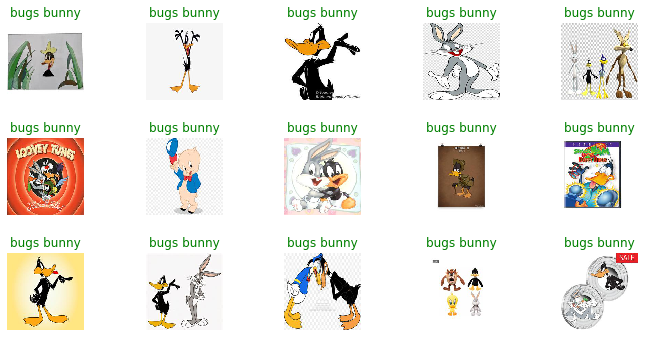

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)